In [5]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tensorboard.backend.event_processing import event_accumulator
import subprocess
import webbrowser
import os

In [2]:
def get_summary(save_path,prepend=""):
    ea = event_accumulator.EventAccumulator(save_path)
    if not os.path.exists(save_path):
        print("no save path found, returning empy dict...")
        return dict()
    ea.Reload()
    res = dict()
    for tag in ea.Tags()['scalars']:
        evs = ea.Scalars(tag)
        wall_time = [e.wall_time for e in evs]
        step = [e.step for e in evs]
        value = [e.value for e in evs]
        tag = prepend + tag
        res[tag] = value
        res[tag+"_step"] = step
        res[tag + "_wall_time"] = wall_time
    res[prepend + 'scalars'] = [prepend + t for t in ea.Tags()['scalars']]
    scalars = ea.Tags()['scalars']
    print("> get_summary():%s*; got %i scalars %s" % (prepend, len(scalars), ", ".join(scalars)))

    drs = os.listdir(save_path)
    for d in drs:
        np = os.path.join(save_path, d)
        if os.path.isdir(np):
            res.update( get_summary(np, d+'/') )
    return res

In [3]:
logs = get_summary('/home/louis/env/py36cv4/ViZDoom/02460_doom_rl_2019/gdoom/DefendCenter_goodPerformance')

> get_summary():*; got 0 scalars 
INFO:tensorflow:No path found after /home/louis/env/py36cv4/ViZDoom/02460_doom_rl_2019/gdoom/DefendCenter_goodPerformance/train_v2_lr=0.0001_bs=10_0/events.out.tfevents.1556385093.TOBIAS-PC
> get_summary():train_v2_lr=0.0001_bs=10_0/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Kills, Losses/Value Loss, Losses/Policy Loss, Losses/Entropy, Losses/Grad Norm, Losses/Var Norm
INFO:tensorflow:No path found after /home/louis/env/py36cv4/ViZDoom/02460_doom_rl_2019/gdoom/DefendCenter_goodPerformance/train_v2_lr=0.0001_bs=10_1/events.out.tfevents.1556385110.TOBIAS-PC
> get_summary():train_v2_lr=0.0001_bs=10_1/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Kills, Losses/Value Loss, Losses/Policy Loss, Losses/Entropy, Losses/Grad Norm, Losses/Var Norm
INFO:tensorflow:No path found after /home/louis/env/py36cv4/ViZDoom/02460_doom_rl_2019/gdoom/DefendCenter_goodPerformance/train_v2_lr=0.0001_bs=10_2/events.out.tfevents.1556385097.TOBIAS-PC
> get_su

In [6]:
timealive = logs['train_v2_lr=0.0001_bs=10_0/Perf/Length']
timealive = np.asarray(timealive)

# the total number of frames used to train:
timealive.sum()*20

3057020.002746582

In [11]:
# Average time alive in the last 100 episodes
int(round(timealive[-20:-1].mean(), 0))

367

In [12]:
kills = np.asarray(logs['train_v2_lr=0.0001_bs=10_0/Kills'])

# Average kills over last 100 episodes
int(round(kills[-20:-1].mean(), 0))

24

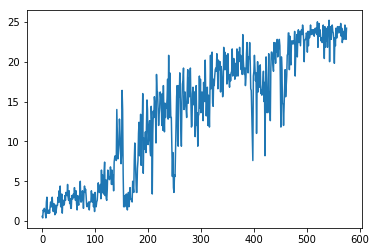

In [13]:
plt.plot(kills)